In [16]:
# threw my best model in its own Jupyter notebook for readability

#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

pd.options.display.max_colwidth = 400

df = pd.read_csv('./outputs/sports-clean.csv', index_col='Unnamed: 0')
df.drop(columns='Unnamed: 0.1', inplace=True)

In [9]:
df.tail()

,title,subreddit
1495,2023 Reverse Retro Concept Series - Boston Bruins,hockey
1496,Fun Fact about Boston Fans,hockey
1497,Tricky Ricky Rakell does it himself and scores a beut,hockey
1498,[BUF 3 - NYI 1] Tage Thompson hammers the one timer home for his 37th goal of the season,hockey
1499,"[PIT v DET] Matheson to Rakell who goes 5 hole, 4/23/2022",hockey


In [18]:
#train/test split
X = df['title']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

#vectorize the text
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

X_train_cv = pd.DataFrame(X_train_cv.A, columns=cv.get_feature_names_out())
X_test_cv = pd.DataFrame(X_test_cv.A, columns=cv.get_feature_names_out())

vc1 = VotingClassifier([
    ('logreg', LogisticRegression(max_iter=10_000)),
    ('tree', RandomForestClassifier()),
    ('nb', MultinomialNB())
    ],
    voting='soft',
    weights=[.3,.3,.4],
    n_jobs=-1
)
vc1.fit(X_train_cv, y_train)
vc1.score(X_test_cv, y_test)

0.8820704375667022

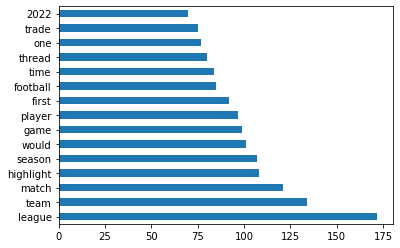

In [41]:
X_train_cv.sum().sort_values(ascending=False).head(15).plot(kind='barh');